# 3. Model building - Random Forest

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier


After obtaining cleaning up the data and selecting the variables, we will be trying to build a model to predict whether a stock if worth investing in depending on the column "Class". If class == 1, then it has a positive Price Var and its worth investing in. If class == 0, then it has a negative Price Var and its not worth investing in.

We will be using "Revenue", "EBITDA", "Profit Margin", "returnOnEquity", "Book Value per Share", "Operating Cash Flow", "Dividend Yield", "R&D Expenses" as our predictors.

In [3]:
df = pd.read_csv('2015_filtered.txt')
df

,Revenue,EBITDA,Profit Margin,returnOnEquity,Book Value per Share,Operating Cash Flow,Dividend Yield,R&D Expenses,PRICE VAR [%],Class,Sector
0,4.395200e+09,510300000.0,0.053000,0.2397,2.745,5.263000e+08,0.0063,0.0,-25.384677,0,Consumer Defensive
1,4.083450e+08,60534500.0,0.042000,0.0713,10.078,5.204137e+07,0.0000,0.0,-24.047624,0,Consumer Defensive
2,3.394800e+09,766900000.0,0.121000,0.2028,7.716,6.061000e+08,0.0158,0.0,8.676289,1,Consumer Defensive
3,7.146230e+08,226524000.0,0.110000,0.1247,12.030,1.562550e+08,0.0000,0.0,5.125095,1,Consumer Defensive
4,5.177078e+09,307952000.0,0.022000,0.1447,14.771,3.185620e+08,0.0111,0.0,33.185500,1,Consumer Defensive
...,...,...,...,...,...,...,...,...,...,...,...
1631,1.236240e+08,9858000.0,0.033000,0.1173,5.048,4.439000e+06,0.0000,0.0,10.882961,1,Technology
1632,5.740290e+07,365139.0,0.003000,0.0213,4.604,7.135220e+05,0.0000,0.0,33.101842,1,Technology
1633,5.800000e+07,5000000.0,-0.017241,0.0713,10.078,-2.000000e+06,0.0000,0.0,34.769228,1,Technology
1634,3.820900e+08,8743000.0,0.015000,0.1508,8.342,8.185000e+06,0.0371,0.0,6.050663,1,Technology


In [4]:
y = pd.DataFrame(df["Class"])

predictors = pd.DataFrame(df[["Revenue", "EBITDA", "Profit Margin", "returnOnEquity", "Book Value per Share", 
                                 "Operating Cash Flow", "Dividend Yield"]])
X = predictors

<ipython-input-5-f933f0314320>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest.fit(X_train, y_train)                         # train the model


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7815810920945395
True Postitive Rate 		: 1.0
True Negative Rate 		: 0.09764309764309764
False Negative Rate 		: 0.0
False Postitive Rate 		: 0.9023569023569024

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7897310513447433
True Postitive Rate 		: 0.9907692307692307
True Negative Rate 		: 0.011904761904761904
False Negative Rate 		: 0.009230769230769232
False Postitive Rate 		: 0.9880952380952381



<AxesSubplot:>

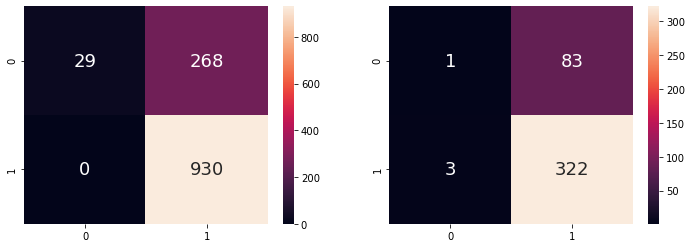

In [5]:
rforest = RandomForestClassifier(n_estimators = 500,  # n_estimators denote number of trees
                                 max_depth = 6)       # set the maximum depth of each tree

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Random Forest using Train Data
rforest = RandomForestClassifier(n_estimators = 100, max_depth = 4)  # create the object
rforest.fit(X_train, y_train)                         # train the model

# Predict Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

#Getting the confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred)

TP_train = train_confusion[1][1]
FN_train = train_confusion[1][0]
TN_train = train_confusion[0][0]
FP_train = train_confusion[0][1]

test_confusion = confusion_matrix(y_test, y_test_pred)

TP_test = test_confusion[1][1]
FN_test = test_confusion[1][0]
TN_test = test_confusion[0][0]
FP_test = test_confusion[0][1]

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X_train, y_train))
print("True Postitive Rate \t\t:", TP_train/(TP_train+FN_train))
print("True Negative Rate \t\t:", TN_train/(TN_train+FP_train))
print("False Negative Rate \t\t:", FN_train/(FN_train+TP_train))
print("False Postitive Rate \t\t:", FP_train/(FP_train+TN_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X_test, y_test))
print("True Postitive Rate \t\t:", TP_test/(TP_test+FN_test))
print("True Negative Rate \t\t:", TN_test/(TN_test+FP_test))
print("False Negative Rate \t\t:", FN_test/(FN_test+TP_test))
print("False Postitive Rate \t\t:", FP_test/(FP_test+TN_test))
print()


# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(train_confusion,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(test_confusion, 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Utilizing the random forest model, we managed to obtain a classification accuracy of around 0.78 for the training data set and a classification accuracy of around 0.78 for the test data set. 
Both of which are strongly(?) accurate. 

The random forest model also has a very high true positive rate of 0.97 for the train and 0.99 for the test data sets. 
However, the true negative rate is rather low at 0.097 for the train and 0.011 for the test data set. Therefore, there is a large amount of data that is being wrongly classified as negatives. As such, a better model is needed to improve on these rates. We thus, turn to Grid Search.